In [3]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from dataclasses import dataclass
from glide_polar import GlidePolar
from maccready_math import calculate_speed_to_fly

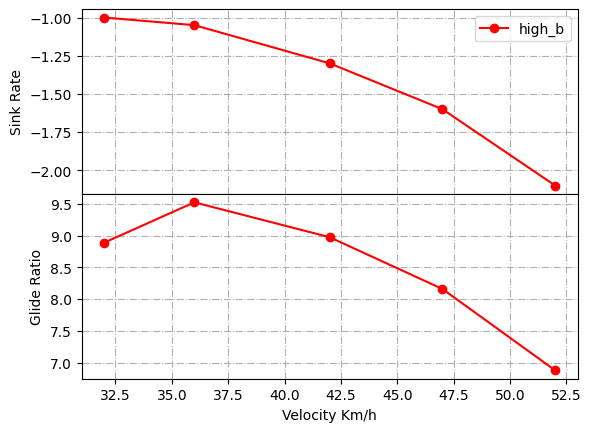

In [4]:
glide_polar_high_b = GlidePolar(
    [ 32,      36,    42,     47,   52], # velocity kmh
    [ -1,   -1.05,  -1.3,  -1.6,  -2.1]) # sink_rate
glide_polar_high_c = GlidePolar(
    [ 32,      36,    43.5,     50,   57], # velocity kmh
    [ -1,   -1.05,  -1.32,  -1.6,  -2.1])  # sink_rate
glide_polar_ccc = GlidePolar(
    [ 32,      36,    45,  55,   65],  # velocity kmh
    [ -1,   -1.05,  -1.35,  -1.8,  -2.6]) # sink_rate


fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
ax_top, ax_bottom = gs.subplots(sharex=True)

glide_polar_high_b.plot_polar(ax_top, color="red", label = "high_b")
glide_polar_high_b.plot_glide(ax_bottom, color="red", label = "high_b")
# glide_polar_high_c.plot_polar(ax_top, color= "blue", label = "high_c")
# glide_polar_high_c.plot_glide(ax_bottom, color= "blue", label = "high_c")
# glide_polar_ccc.plot_polar(ax_top, color = "green", label = "ccc")
# glide_polar_ccc.plot_glide(ax_bottom, color = "green", label = "ccc")

ax_top.legend()

In [ ]:
def print_bar_tables():
    thermals = [0.5, 1, 2, 3, 4]
    wind_speeds_ms = [v/3.6 for v in range(-20, 25, 5)]

    header_row = ["Wind Speed (kmh)"]
    header_row += [f"MacCready {t}" for t in thermals]
    t_b = PrettyTable(header_row)
    t_c = PrettyTable(header_row)
    for wind_speed in wind_speeds_ms:
        speed_to_fly_b = calculate_speed_to_fly(glide_polar_high_b, thermals, wind_speed)
        speed_to_fly_c = calculate_speed_to_fly(glide_polar_high_c, thermals, wind_speed)

        row_b = [int(wind_speed * 3.6)]
        row_c = [int(wind_speed * 3.6)]
        for thermal_strength in thermals:
            speed_kmh = int(speed_to_fly_b[thermal_strength]['speed_to_fly'] * 3.6)
            row_b.append(f"{GlidePolar.velocity_idx_to_speedbar(speed_to_fly_b[thermal_strength]['speed_to_fly_index'])}\n{speed_kmh} kmh")
            row_c.append(GlidePolar.velocity_idx_to_speedbar(speed_to_fly_c[thermal_strength]["speed_to_fly_index"]))
        t_b.add_row(row_b)
        t_c.add_row(row_c)
    print("--- Optimized Speedbar usage for a High B ---")
    print(t_b)
    print("--- Optimized Speedbar usage for a High C ---")
    print(t_c)
print_bar_tables()

--- Optimized Speedbar usage for a High B ---
+------------------+---------------+-------------+-------------+-------------+-------------+
| Wind Speed (kmh) | MacCready 0.5 | MacCready 1 | MacCready 2 | MacCready 3 | MacCready 4 |
+------------------+---------------+-------------+-------------+-------------+-------------+
|       -20        |      Trim     |     Trim    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |
|                  |       36      |      36     |      42     |      47     |      47     |
|       -15        |      Trim     |     Trim    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |
|                  |       36      |      36     |      42     |      47     |      47     |
|       -10        |      Trim     |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |   2/3 Bar   |
|                  |       36      |      42     |      47     |      47     |      47     |
|        -5        |      Trim     |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |   Full Bar  |
|                  |    

Text(0.5, 1.05, 'Minimum time to fly 100km')

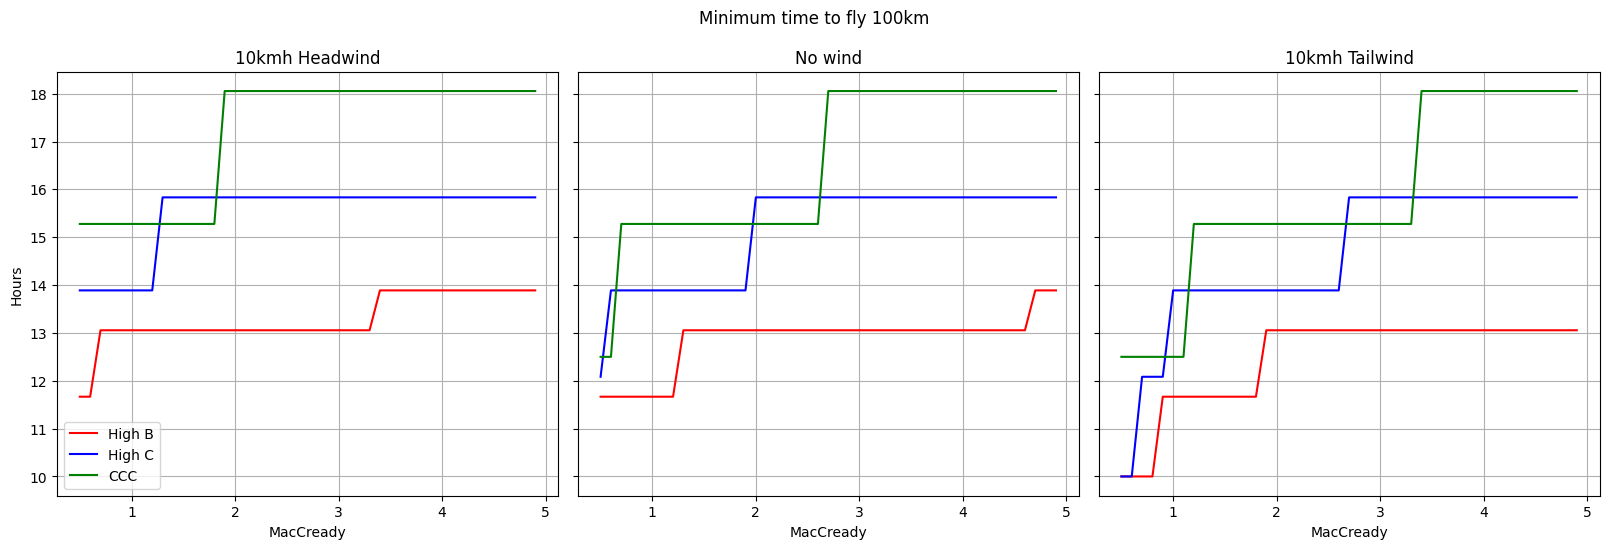

In [34]:
def time_made_good_chart(ax, wind_speed):
    thermals = [x / 10 for x in range(5, 50)]

    for wing_label, polar, color in [("High B", glide_polar_high_b, "red"),
                              ("High C", glide_polar_high_c, "blue"), 
                              ("CCC", glide_polar_ccc, "green")]:
        speed_to_fly = calculate_speed_to_fly(polar, thermals, wind_speed)
        speed_made_good = [speed_to_fly[ts]["speed_to_fly"] for ts in thermals]
        index = [speed_to_fly[ts]["speed_to_fly_index"] for ts in thermals]
        ax.plot(thermals, speed_made_good, label = wing_label, color = color)

fig, axes = plt.subplots(1, 3, figsize = (16, 5), sharex=True, sharey=True)

time_made_good_chart(axes[0], 10/3.6)
time_made_good_chart(axes[1], 0)
time_made_good_chart(axes[2], -10/3.6)

axes[0].legend(loc="lower left")
axes[0].set_title("10kmh Headwind")
axes[1].set_title("No wind")
axes[2].set_title("10kmh Tailwind")
plt.tight_layout()

for ax in axes: 
    ax.grid()
    ax.set_xlabel("MacCready")
axes[0].set_ylabel("Hours")
fig.suptitle("Minimum time to fly 100km", y=1.05)